<a href="https://colab.research.google.com/github/hitanshi08/BharatIntern/blob/main/Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic = sns.load_dataset("titanic")

In [ ]:
# Display the first few rows of the dataset
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [ ]:
# Get an overview of the dataset
print(titanic.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [ ]:
# Summary statistics of numerical features
print(titanic.describe())


         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [ ]:
# Count the number of missing values in each column
print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


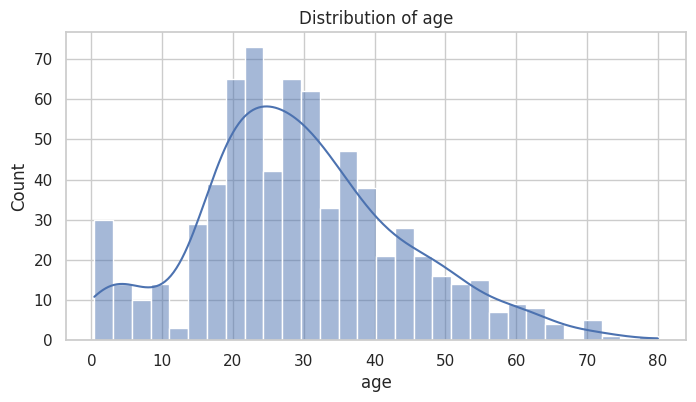

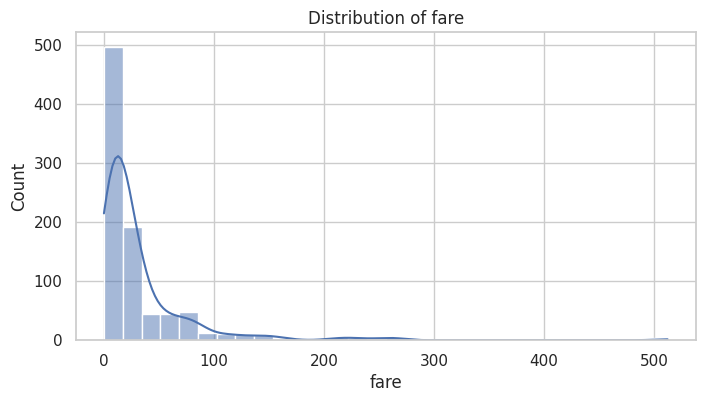

In [ ]:
# Visualize the distribution of numerical features
numerical_features = ["age", "fare"]
sns.set(style="whitegrid")
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=titanic, x=feature, kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

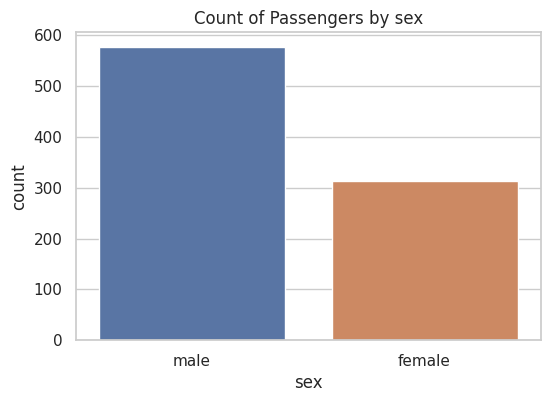

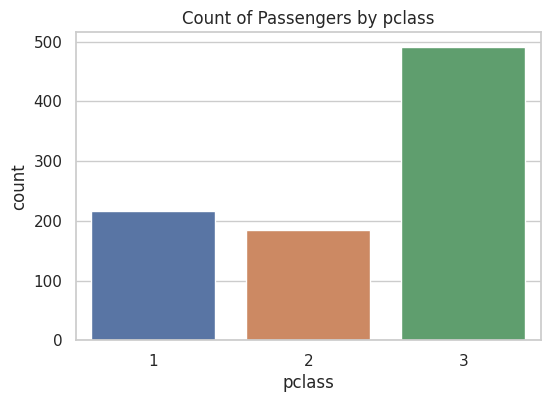

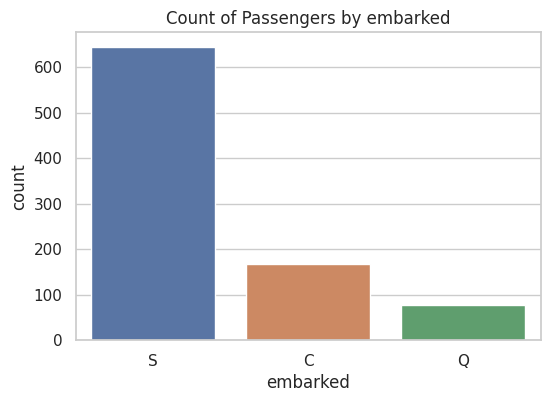

In [ ]:
# Visualize categorical features
categorical_features = ["sex", "pclass", "embarked"]
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=titanic, x=feature)
    plt.title(f'Count of Passengers by {feature}')
    plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the Titanic dataset
titanic = sns.load_dataset("titanic")

# Data Preprocessing

# Handling Missing Data
# Fill missing values in the 'age' column with the mean age
titanic['age'].fillna(titanic['age'].mean(), inplace=True)

# Fill missing values in the 'embarked' column with the most common value
most_common_embarked = titanic['embarked'].mode()[0]
titanic['embarked'].fillna(most_common_embarked, inplace=True)

# Encoding Categorical Variables
# Encode the 'sex' column using one-hot encoding
titanic = pd.get_dummies(titanic, columns=['sex'], drop_first=True)

# Encode the 'embarked' column using one-hot encoding
titanic = pd.get_dummies(titanic, columns=['embarked'], drop_first=True)

# Feature Selection
# In this example, we'll select features 'pclass', 'age', 'fare', 'sex_male', and 'embarked_Q' for simplicity.
selected_features = ['pclass', 'age', 'fare', 'sex_male', 'embarked_Q']

X = titanic[selected_features]
y = titanic['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
model = LogisticRegression()

# You can also fit the model to your training data at this step
model.fit(X_train, y_train)



LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Use the trained model to make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
[[89 16]
 [20 54]]


In [ ]:
import matplotlib.pyplot as plt

# Get feature importances (if applicable to your model, e.g., for decision tree or random forest)
if hasattr(model, "feature_importances_"):
    feature_importance = model.feature_importances_
    feature_names = X_train.columns
    importance_dict = dict(zip(feature_names, feature_importance))

    # Sort features by importance
    sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(*zip(*sorted_importance))
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance')
    plt.show()
else:
    print("Feature importance analysis not applicable for this model.")


Feature importance analysis not applicable for this model.


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],               # Type of penalty (L1 or L2)
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print(f"Accuracy with Best Model: {accuracy:.2f}")


Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Accuracy with Best Model: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

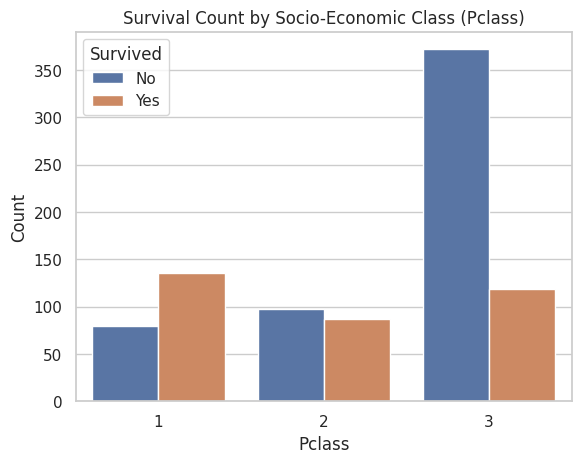

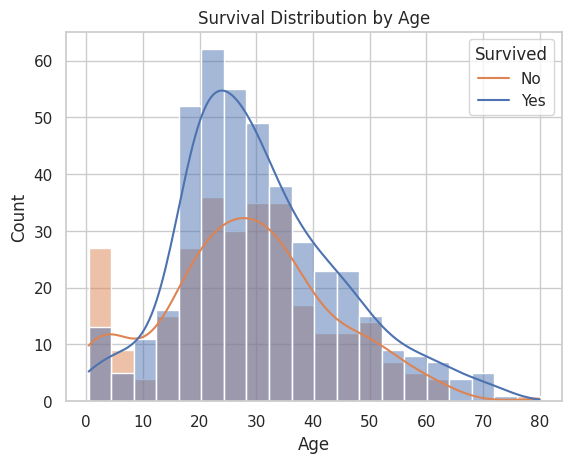

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
titanic = sns.load_dataset("titanic")

# Visualize the impact of socio-economic class (Pclass) on survival
sns.countplot(data=titanic, x='pclass', hue='survived')
plt.title('Survival Count by Socio-Economic Class (Pclass)')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Visualize the impact of age on survival
sns.histplot(data=titanic, x='age', hue='survived', kde=True, common_norm=False)
plt.title('Survival Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()



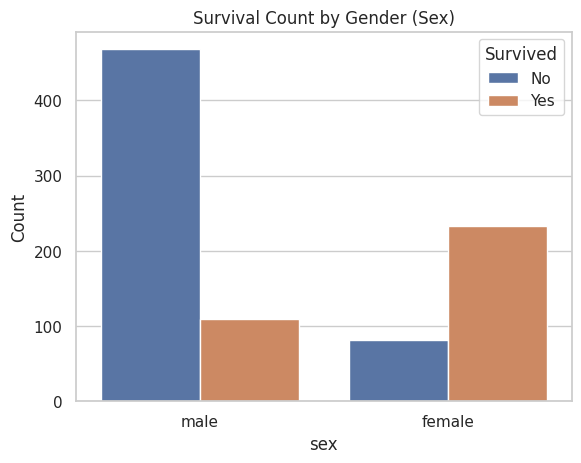

In [ ]:
# Visualize the impact of gender (Sex) on survival
sns.countplot(data=titanic, x='sex', hue='survived')
plt.title('Survival Count by Gender (Sex)')
plt.xlabel('sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2']  # Regularization type
}

# Create a GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters and model
print("Best Hyperparameters:", best_params)

# Re-evaluate the best model
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

# Print the accuracy of the best model
print(f"Accuracy of the Best Model: {accuracy_best:.2f}")


Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Accuracy of the Best Model: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze feature importance (if applicable to your model, e.g., for decision tree or random forest)
if hasattr(model, "feature_importances_"):
    feature_importance = model.feature_importances_
    feature_names = X.columns
    importance_dict = dict(zip(feature_names, feature_importance))

    # Sort features by importance
    sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x=[x[1] for x in sorted_importance], y=[x[0] for x in sorted_importance])
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance')
    plt.show()
else:
    print("Feature importance analysis not applicable for this model.")


Feature importance analysis not applicable for this model.


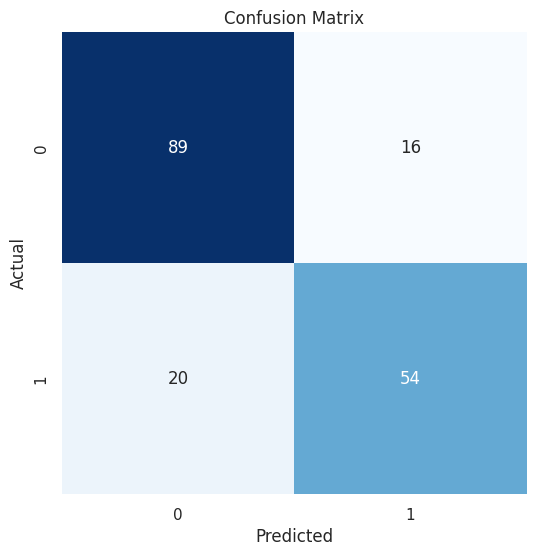

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model and create visualizations

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
